# ANALYSING IPL DATASET

The main purpose of the study is to levarage data science models to understand the dataset, their relationships and various other exploratory data analysis.

The analysis focuses on:-

1. EDA - Exploratory data analysis
2. Data pre-processing - data cleaning, trimming (except for deliveries.csv)
3. Leveraging libraries such as numpy, pandas, matplotlib, seaborn, scipy stats model.
4. Performed 2 tests ie.
    a. chi square test to understand if there is any statistical relationship btw 2 variables.
    b. phi test to understand the measure of association
    

Note:- There is some amount of domain knowledge used and assumptions made as this is only for data science practic project.



In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd

#importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing statistical libraries
import scipy.stats as stats

In [2]:
github_repository = pd.read_csv("matches.csv")
df = github_repository 

In [3]:
# Exploratory data analysis
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Exploratory data analysis
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
df.shape #The dataframe has 756 rows and 18 columns

(756, 18)

In [6]:
df.columns 

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df.dtypes #understanding the datatypes and clearly only 2 datatypes are present ie. string and integer

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [8]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
df['city'].isnull().sum() #number of null values in the city

7

In [10]:
# Replacing NULL Values with unkown in the dataset
df['city'].fillna('unknown', inplace=True)
df['winner'].fillna('unkown', inplace=True)
df['player_of_match'].fillna('unknown', inplace=True)
df['umpire1'].fillna('unknown', inplace=True)
df['umpire2'].fillna('unknown', inplace=True)
df['umpire3'].fillna('unknown', inplace=True)

In [11]:
df.isnull().sum()  #Data is trimmed and has no missing values for analysis

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [12]:
#Understanding player performance

players = df['player_of_match'].value_counts()
players

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 227, dtype: int64

In [13]:
top5 = players[:5] #Players with the highest number of man of match awards
top5

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [14]:
least5 = players[-5:] #Players with the least number of man of match awards
least5

PD Collingwood    1
NV Ojha           1
AC Voges          1
J Theron          1
S Hetmyer         1
Name: player_of_match, dtype: int64

In [15]:
result = df['result'].value_counts().sort_values(ascending=True)
result

no result      4
tie            9
normal       743
Name: result, dtype: int64

Here normal represents win or a loss situation, tie represents a tie and no result could be due to weather conditions

In [16]:
cross_tab = pd.crosstab(df['toss_winner'], df['winner'])
cross_tab

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,unkown
toss_winner,,,,,,,,,,,,,,,,
Chennai Super Kings,57,1,0,4,0,5,0,4,7,1,3,0,0,5,2,0
Deccan Chargers,2,19,0,5,0,3,0,3,4,1,3,0,0,3,0,0
Delhi Capitals,2,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0
Delhi Daredevils,5,0,0,35,1,7,0,5,9,1,7,0,0,5,4,1
Gujarat Lions,0,0,0,0,10,2,0,0,1,0,0,0,0,2,0,0
Kings XI Punjab,3,2,0,3,0,35,0,8,6,2,6,0,1,7,8,0
Kochi Tuskers Kerala,0,1,0,0,0,0,4,0,0,1,0,0,0,2,0,0
Kolkata Knight Riders,6,1,0,5,0,6,2,53,7,1,4,0,0,2,5,0
Mumbai Indians,5,0,1,6,0,9,0,3,56,1,3,2,1,6,5,0


In [17]:
#Performing chi square test to see if there is any statistical significance between toss winner and match winner
chi2, p_value1, dof, expected = stats.chi2_contingency(cross_tab)

In [18]:
if p_value1 <= 0.05:
    print("There is a statistical significance between toss winner and match winner")
else:
    print("There is no statistical significance found")

There is a statistical significance between toss winner and match winner


In [19]:
#After performing chi square test, perform phi test to calculate the measure of association
n1 = cross_tab.sum().sum() #Total sum of the 2 columns
print(n1)

#This is a standard phi formula which can be found on the web
phi1 = ((chi2/n1)**0.5) * ((cross_tab.shape[0]*cross_tab.shape[1])/((cross_tab.shape[0]-1)*(cross_tab.shape[1]-1)))**0.5
print("The phi value is : {}".format(phi1))

756
The phi value is : 2.1048819099791314


After performing a chi square test between toss winner and match winner it's clear with the results that there is a statistical significance relationship that is found.

The magnitude of the phi coefficient can be interpreted as the strength of the association between the variables.

The Phi value for understanding the measure of association btw toss winner and winner is 0.33. This shows a "moderate positive relationship" of association btw the 2 variables. The presence of one variable is moderately likely to be associated with the presence of another variable.

In [20]:
cross_tab2 = pd.crosstab(df['city'], df['result'])
cross_tab2

result,no result,normal,tie
city,,,
Abu Dhabi,0,6,1
Ahmedabad,0,11,1
Bangalore,2,63,1
Bengaluru,1,13,0
Bloemfontein,0,2,0
Cape Town,0,6,1
Centurion,0,12,0
Chandigarh,0,46,0
Chennai,0,56,1


In [21]:
#Performing chi square test to see if there is any statistical significance between city and result
chi2, p_value2, dof, expected = stats.chi2_contingency(cross_tab2)

In [22]:
if p_value2 <= 0.05:
    print("There is a statistical significance between toss winner and match winner")
else:
    print("There is no statistical significance found")

There is no statistical significance found


In [23]:
#After performing chi square test, perform phi test to calculate the measure of association
n2 = cross_tab2.sum().sum() #Total sum of the 2 columns
print(n2)

#This is a standard phi formula which can be found on the web
phi2 = ((chi2/n2)**0.5) * ((cross_tab2.shape[0]*cross_tab2.shape[1])/((cross_tab2.shape[0]-1)*(cross_tab2.shape[1]-1)))**0.5
print("The phi value is : {}".format(phi2))

756
The phi value is : 0.3518229957698802


Post performing chi square test to find any statistical significance between city and result showed no such relationships. Ideally since there was no statistical significance proved chi square test isn't necessary but I performed here for inights and practice.


In [24]:
cross_tab3 = pd.crosstab(df['toss_decision'], df['winner'])
cross_tab3

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,unkown
toss_decision,,,,,,,,,,,,,,,,
bat,52,14,2,29,2,21,0,35,45,9,34,0,2,26,21,1
field,48,15,8,38,11,61,6,57,64,3,41,10,3,58,37,3


In [25]:
#Performing chi square test to see if there is any statistical significance between winner and toss decision
chi2, p_value3, dof, expected = stats.chi2_contingency(cross_tab3)

In [26]:
if p_value3 <= 0.05:
    print("There is a statistical significant relationship btw winner and toss decision")
else:
    print("There is no statistical significant relationship btw winner and toss decision")

There is a statistical significant relationship btw winner and toss decision


In [27]:
#After performing chi square test, perform phi test to calculate the measure of association
n = cross_tab3.sum().sum() #Total sum of the 2 columns
print(n)

#This is a standard phi formula which can be found on the web
phi3 = ((chi2/n)**0.5) * ((cross_tab3.shape[0]*cross_tab3.shape[1])/((cross_tab3.shape[0]-1)*(cross_tab3.shape[1]-1)))**0.5
print("The phi value is : {}".format(phi3))

756
The phi value is : 0.3384886697120944


The magnitude of the phi coefficient can be interpreted as the strength of the association between the variables.

The Phi value for understanding the measure of association btw toss decision and winner is 0.33. This shows a "moderate positive relationship" of association btw the 2 variables. The presence of one variable is moderately likely to be associated with the presence of another variable. 

# Plotting the graphs

In [28]:
#Creating a list of the top 5 players with just the keys
l1 = df['player_of_match'].value_counts()[0:5].keys()
print(l1)

#Creating a list of the top 5 players with also the keys and values
l2 = df['player_of_match'].value_counts()[0:5]
print(l2)

Index(['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner'], dtype='object')
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64


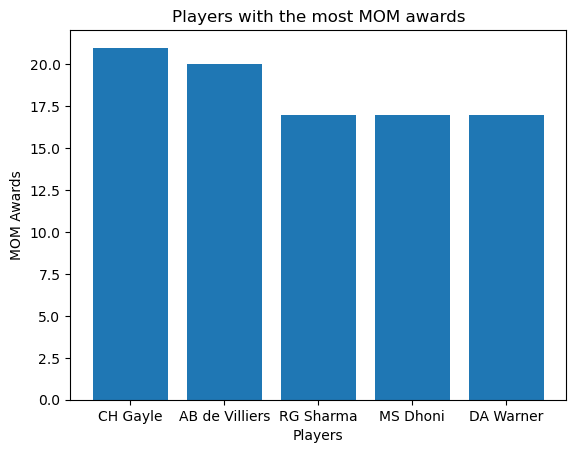

In [29]:
plt.bar(l1,l2 )
plt.title("Players with the most MOM awards")
plt.xlabel("Players")
plt.ylabel("MOM Awards")
plt.show()

In [30]:
# Top 3 best performing team based purely on batting first and winning

l3 = df['winner'].value_counts()[0:3]
print(l3)

l4 = df['winner'].value_counts()[0:3].keys()
print(l4)

Mumbai Indians           109
Chennai Super Kings      100
Kolkata Knight Riders     92
Name: winner, dtype: int64
Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'], dtype='object')


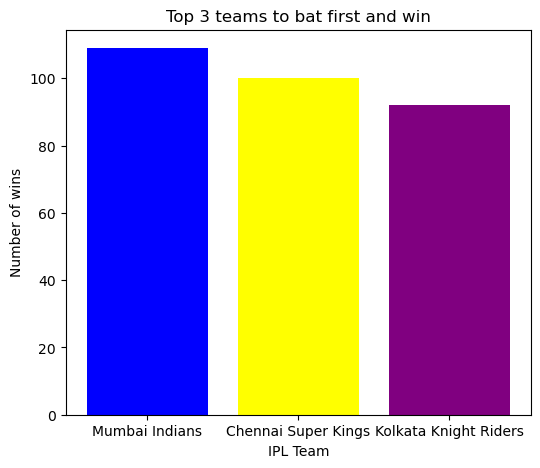

In [31]:
# Plotting the same above
plt.figure(figsize=(6,5))
plt.bar(l4,l3, color=['blue','yellow','purple'])
plt.title("Top 3 teams to bat first and win")
plt.xlabel("IPL Team")
plt.ylabel("Number of wins")
plt.show()

([<matplotlib.patches.Wedge at 0x7f99c9fd1b40>,
 [Text(0.8172942376282171, 0.7362269549124858, 'Mumbai Indians'),
  Text(-0.5921559633424185, 0.9270120361020198, 'Chennai Super Kings'),
  Text(-1.0542980201225824, -0.3137764885481434, 'Kolkata Knight Riders'),
  Text(-0.10712848792923041, -1.0947709747129748, 'Royal Challengers Bangalore'),
  Text(0.9368392599163505, -0.5764826112550011, 'Kings XI Punjab')],
 [Text(0.4457968568881184, 0.401578339043174, '23.3%'),
  Text(-0.3229941618231373, 0.5056429287829198, '21.4%'),
  Text(-0.5750716473395904, -0.17115081193535092, '19.7%'),
  Text(-0.05843372068867113, -0.5971478043888953, '18.0%'),
  Text(0.5110032326816457, -0.31444506068454603, '17.6%')])

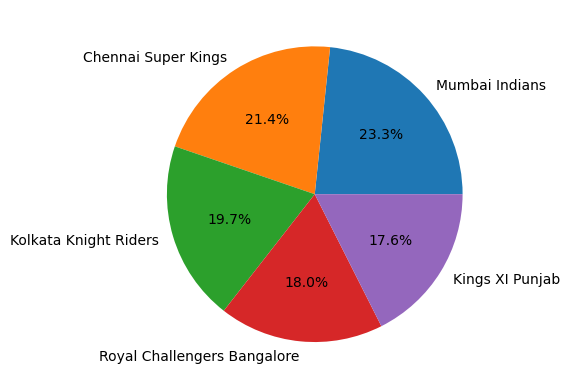

In [32]:
#Top 5 teams and their % calculation
l4 = df['winner'].value_counts()[0:5]
l5 = df['winner'].value_counts()[0:5].keys()
plt.pie(l4, labels=l5, autopct='%0.1f%%')

In [33]:
# Analysing Top 3 best performing team based purely on bowling first and winning

#df2 gets the records of all the teams that have won on the basis of taking more wickets or batting second.
df2 = df[df['win_by_wickets']!=0]
df2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,unknown
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,unknown
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,unknown
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,unknown
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,unknown,unknown,unknown


In [34]:
t5 = df2['winner'].value_counts()[0:3]
t5

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Name: winner, dtype: int64

In [35]:
t6 = df2['winner'].value_counts()[0:3].keys()
t6

Index(['Kolkata Knight Riders', 'Mumbai Indians',
       'Royal Challengers Bangalore'],
      dtype='object')

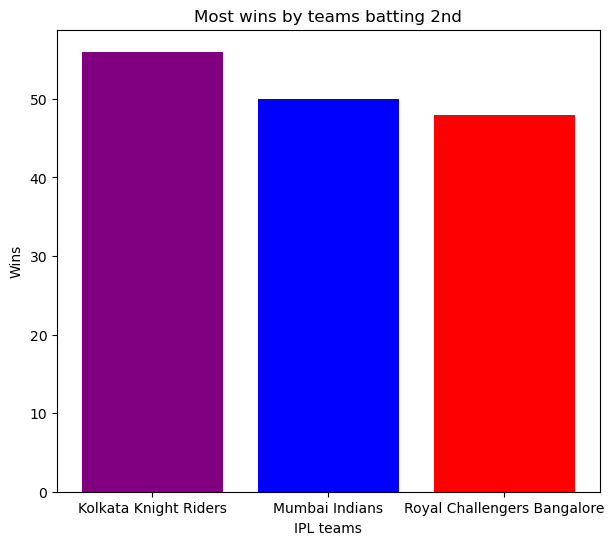

In [36]:
plt.figure(figsize=(7,6))
plt.bar(t6,t5, color=['purple', 'blue', 'red'])
plt.title("Most wins by teams batting 2nd")
plt.xlabel("IPL teams")
plt.ylabel("Wins")
plt.show()

In [37]:
# Number of matches played per season
s1 = df['season'].value_counts().sort_index()
s1

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64

In [38]:
# Most number of games played based on venue
df['city'].value_counts()[0:5]

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: city, dtype: int64

In [39]:
# How many times have the teams won after winning the toss
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,unknown
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,unknown
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,unknown
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,unknown
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,unknown,unknown,unknown


In [40]:
#Total number of games where the team winning the toss ended up winning the game
np.sum(df['toss_winner']== df['winner'])

393

In [41]:
df3 = pd.read_csv("deliveries.csv")
df3

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [42]:
df3.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [43]:
df3.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [44]:
# creating a cross tab to understand the relationship between the bowler and the over that he bowls
cross_tab9 = pd.crosstab(df3['bowler'], df3['over']).transpose()
cross_tab9

bowler,A Ashish Reddy,A Chandila,A Choudhary,A Dananjaya,A Flintoff,A Joseph,A Kumble,A Mishra,A Mithun,A Nehra,...,WPUJC Vaas,Washington Sundar,Y Gnaneswara Rao,Y Nagar,Y Venugopal Rao,YA Abdulla,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
over,,,,,,,,,,,,,,,,,,,,,
1,0,72,18,0,0,0,49,13,0,159,...,66,12,0,0,6,0,118,31,0,421
2,0,0,7,6,0,6,6,7,13,315,...,13,38,0,0,6,15,24,48,0,146
3,0,48,6,0,0,0,12,12,0,145,...,60,30,0,0,12,12,74,37,0,384
4,0,0,6,0,0,6,12,31,12,266,...,13,43,0,6,6,13,55,64,0,134
5,0,24,0,0,6,12,12,32,27,130,...,42,13,0,0,0,37,44,48,0,200
6,6,0,0,0,6,0,18,42,19,116,...,6,18,0,0,12,12,53,97,0,61
7,6,30,12,0,6,13,103,285,32,12,...,0,12,0,0,0,19,68,152,90,18
8,7,0,0,6,0,0,62,292,13,24,...,0,30,0,6,12,6,82,132,56,12
9,7,6,13,0,6,0,104,344,13,18,...,0,18,0,0,25,6,55,147,67,12


Lets now see if there is any statistical relationship between the bowler and the over that he bowls. 


With domain knowledge applied, there should ideally be a relationship since certain bowlers would be best suited for specific overs in the game due to experience, style of bowling and the overall game situation at that time.


Lets run a general statistic test ie. chi square to first analyze if there is any statistical relationship.

In [45]:
# Initialising chi square model

chi2,p_val5,dof,expected = stats.chi2_contingency(cross_tab9)

In [46]:
if p_val5 <= 0.05:
    print("There is a statistical relationship btw the bowler and the over he bowls")
else:
    print("There is no statistical relationship btw the bowler and the over he bowls")

There is a statistical relationship btw the bowler and the over he bowls


In [47]:
#After performing chi square test, perform phi test to calculate the measure of association
n5 = cross_tab9.sum().sum()
print(n5)

phi9 = ((chi2/n5)**0.5) * ((cross_tab9.shape[0]*cross_tab9.shape[1])/((cross_tab9.shape[0]-1)*(cross_tab9.shape[1]-1)))**0.5
print("The phi value is: {}".format(phi9))

179078
The phi value is: 0.8426192491053756


The magnitude of the phi coefficient can be interpreted as the strength of the association between the variables.

The Phi value for understanding the measure of association btw bowler and the over he bowls is 0.84. This shows a "positive relationship" of association btw the 2 variables. The presence of one variable is very highly to be associated with the presence of another variable.

Lets see if there is any statistical relationship between the batsman and the runs he scored

In [48]:
crosstab8 = pd.crosstab(df3['batsman'], df3['batsman_runs'])
crosstab8[:5]

batsman_runs,0,1,2,3,4,5,6,7
batsman,,,,,,,,
A Ashish Reddy,61,83,20,1,16,0,15,0
A Chandila,3,4,0,0,0,0,0,0
A Chopra,45,21,2,0,7,0,0,0
A Choudhary,4,13,1,0,1,0,1,0
A Dananjaya,2,2,1,0,0,0,0,0


In [49]:
# Initialising chi square model
chi2, p_val8, dof, expected = stats.chi2_contingency(crosstab8)

In [50]:
#Hypothesis testing 
if p_val8 <= 0.05:
    print("There is a statistical relationship between the batsman and the runs he scored")
else:
    print("There is no statistical relationship between the batsman and the runs he scored")

There is a statistical relationship between the batsman and the runs he scored


In [51]:
# Initialising measure of association using Phi test
n8 = crosstab8.sum().sum()
print(n8)

phi8 = ((chi2/n8)**0.5) * ((crosstab8.shape[0]*crosstab8.shape[1])/((crosstab8.shape[0]-1)*(crosstab8.shape[1]-1)))**0.5
print("The measure of association between batsman and the runs he score is: {}".format(phi8))


179078
The measure of association between batsman and the runs he score is: 0.23149423568113497


Here, the assumption from the dataset, considering the column batsman_runs does represent the runs scored by the batsman and the same with the column batsman.

The measure of association between the 2 is 0.23 which can be intepreted as a "very low relationship" measure of association. The presence of one variable is not associated with the presence of another variable.

Anyhow, taking domain knowledge into consideration the statisitcal analysis seems to be incorrect and requires us to revisit the data, quality of data etc. This is due to in the real world the batsman and the runs he scored are highly associated with each other. 